In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from audio_function import plot1, plot1_f, mean_data_sep,  corr_t, corr_f, cr_arr_t, norm_max, load_mat, first_second_part, filt_freq, t_arr_for_corr_t

Данные загружены


In [ ]:
data_zoom_2 = list(np.empty(13, list))
sample_rate, data_zoom_2[5] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0005/ZOOM0005_Tr2.WAV')
sample_rate, data_zoom_2[6] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0006/ZOOM0006_Tr2.WAV')
sample_rate, data_zoom_2[7] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0007/ZOOM0007_Tr2.WAV')
sample_rate, data_zoom_2[8] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0008/ZOOM0008_Tr2.WAV')
sample_rate, data_zoom_2[9] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0009/ZOOM0009_Tr2.WAV')
sample_rate, data_zoom_2[10] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0010/ZOOM0010_Tr2.WAV')
sample_rate, data_zoom_2[11] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0011/ZOOM0011_Tr2.WAV')
sample_rate, data_zoom_2[12] = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0012/ZOOM0012_Tr2.WAV')
t = [0, 0, 0, 0, 0,]
f = [0, 0, 0, 0, 0,]
for i in range (6, len(data_zoom_2)+1):
    t_i = np.arange(len(data_zoom_2[i-1]))/sample_rate
    f_i = fftfreq(int(len(data_zoom_2[i-1])), 1 / sample_rate)
    t.append(t_i)
    f.append(f_i)
title = ['', '', '', '', '', 'Сигнал с вращением без излучения', 'Сигнал после поднятия кабеля, который упал', 'Сигнал с вращением', 'Сигнал ~0:30 начали вращать 2:05 закончили запись 550 Гц', 'Сигнал шумовой широкополосный источник без вращения', 'Сигнал шумовой + вращение 1:23 конец вращения; 2:57 конец вращения', 'Сигнал шум (ортоганально динамику) + 550Гц без вращения, датчик', 'Сигнал шум + 550Гц с вращением']


In [ ]:
for i in range (5, len(data_zoom_2)):

    plt.figure(figsize=(10,4))
    plt.plot(t[i], data_zoom_2[i], color='blue')
    plt.title(title[i])
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10,4))
    plt.plot(f[i], np.abs(ifft(data_zoom_2[i])), color='blue')
    plt.title(title[i])
    plt.xlim(0, 700)
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(t[12] , data_zoom_2[12], color='blue')
plt.xlim(348, 427)
plt.grid(True)
plt.show()

In [ ]:
t_index = (t[12] > 348) & (t[12] < 427)
t_rotation = t[12][t_index]
data_zoom_2_rotation = data_zoom_2[12][t_index]/max(data_zoom_2[12][t_index])

data_zoom_2_rotation_f = fft(data_zoom_2_rotation)
f_rotation = fftfreq(int(len(data_zoom_2_rotation)), 1 / sample_rate)
data_zoom_2_rotation_filt = ifft(filt_freq(data_zoom_2_rotation_f, 531, 533))

plt.figure(figsize=(10,4))
plt.plot(t_rotation, ((data_zoom_2_rotation_filt)), color='blue')

plt.grid(True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(data_zoom_2_rotation_filt)


In [2]:
sample_rate, data_zoom_21_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0021/ZOOM0021_Tr2.WAV')
t_21 = np.arange(len(data_zoom_21_2))/sample_rate
f_21 = fftfreq(int(len(data_zoom_21_2)), 1 / sample_rate)

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_4879/336601202.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data_zoom_21_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0021/ZOOM0021_Tr2.WAV')


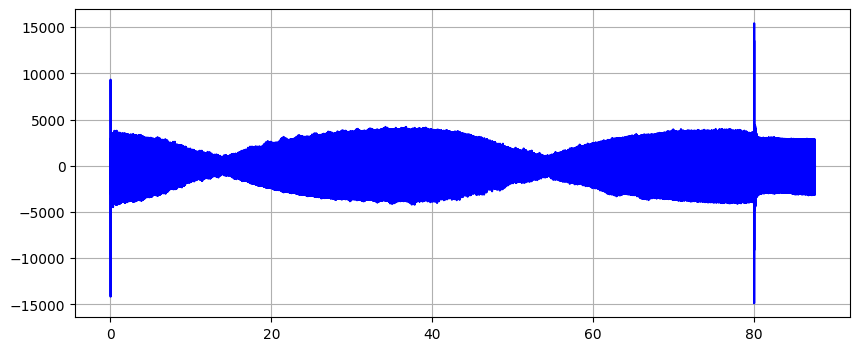

In [3]:
plt.figure(figsize=(10,4))
plt.plot(t_21 , data_zoom_21_2, color='blue')
plt.grid(True)
plt.show()

/Users/bogda/Desktop/Acoustics/Scientific/Python/audio_function.py:145: ComplexWarning: Casting complex values to real discards the imaginary part
  array_f[f_int_1] = data_f[f_int_1]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


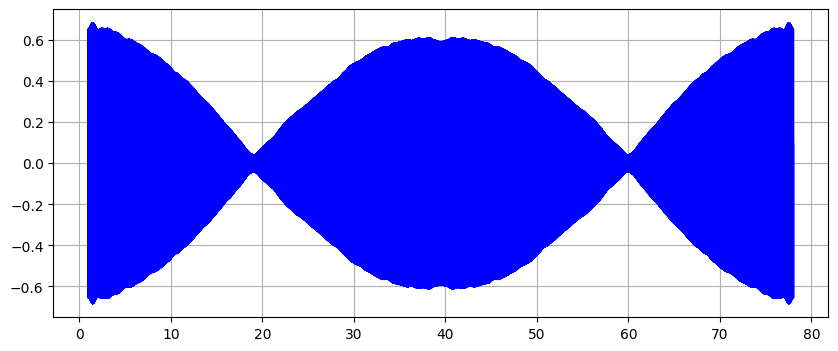

In [4]:
t_index = (t_21 > 1) & (t_21 < 78)
t_rotation = t_21[t_index]
data_zoom_2_rotation = data_zoom_21_2[t_index]/max(data_zoom_21_2[t_index])

data_zoom_2_rotation_f = fft(data_zoom_2_rotation)
f_rotation = fftfreq(int(len(data_zoom_2_rotation)), 1 / sample_rate)
data_zoom_2_rotation_filt = ifft(filt_freq(data_zoom_2_rotation_f, 532, 534))

plt.figure(figsize=(10,4))
plt.plot(t_rotation, ((data_zoom_2_rotation_filt)), color='blue')
# plt.xlim(520, 540)
plt.grid(True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/bogda/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


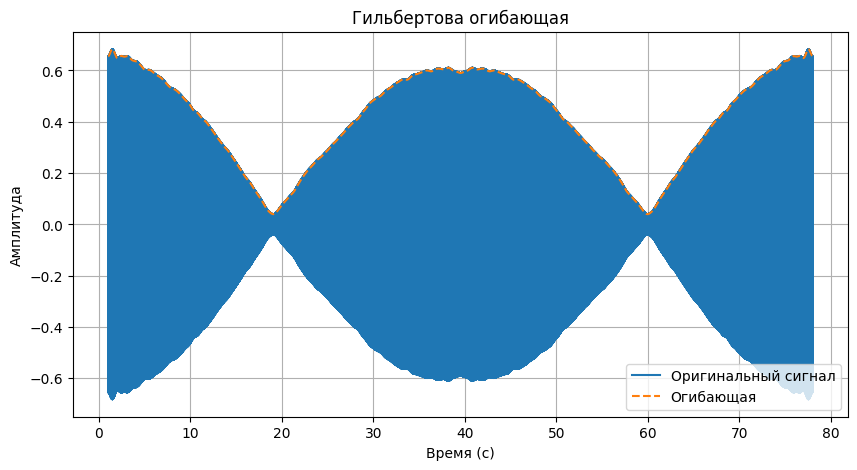

In [12]:
from scipy.signal import hilbert


# Применяем преобразование Гильберта
analytic_signal = hilbert(np.real(data_zoom_2_rotation_filt))
envelope = np.abs(analytic_signal)  # Огибающая

# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(t_rotation, data_zoom_2_rotation_filt, label="Оригинальный сигнал")
plt.plot(t_rotation, envelope, label="Огибающая", linestyle="dashed")
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.title("Гильбертовa огибающая")
plt.grid()
plt.show()


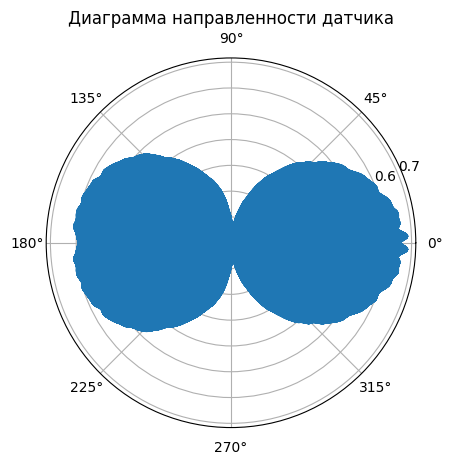

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(data_zoom_2_rotation_filt)


In [ ]:
sample_rate, data_zoom_19_2 = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/PGD_camera/ZOOM0019/ZOOM0019_Tr2.WAV')
t_19 = np.arange(len(data_zoom_19_2))/sample_rate
f_19 = fftfreq(int(len(data_zoom_19_2)), 1 / sample_rate)
plt.figure(figsize=(10,4))
plt.plot(t_19 , data_zoom_19_2, color='blue')
plt.grid(True)
plt.show()

In [ ]:
t_index = (t_19 > 2) & (t_19 < 79)
t_rotation = t_19[t_index]
data_zoom_2_rotation = data_zoom_19_2[t_index]/max(data_zoom_19_2[t_index])

data_zoom_2_rotation_f = fft(data_zoom_2_rotation)
f_rotation = fftfreq(int(len(data_zoom_2_rotation)), 1 / sample_rate)
data_zoom_2_rotation_filt = ifft(filt_freq(data_zoom_2_rotation_f, 532, 534))

plt.figure(figsize=(10,4))
plt.plot(t_rotation, ((data_zoom_2_rotation_filt)), color='blue')

plt.grid(True)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radiation_pattern(signal):
    angles = np.linspace(0, 2 * np.pi, len(signal))  # Углы в радианах
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, np.abs(signal), linewidth=2)
    ax.fill(angles, np.abs(signal), alpha=0.3)  # Закраска под кривой
    
    ax.set_title("Диаграмма направленности датчика")
    plt.show()

# Пример данных: синтетический сигнал, моделирующий направленность
# num_points = 360
# example_signal = np.abs(np.cos(np.linspace(0, 2 * np.pi, num_points)))

plot_radiation_pattern(data_zoom_2_rotation_filt)
